# Resolução da lista 3 de NLP

## Alunos:
  - Eduardo Brasil Araujo
  - Gideão Pinheiro"

### Pré-processamento lista 1

In [1]:
from __future__ import annotations
import pandas as pd
import re
import numpy as np
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\localhost\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\localhost\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\localhost\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\localhost\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
preprocess_data = pd.read_csv('../datasets/website_classification.csv')
raw_text = preprocess_data.cleaned_website_text

In [3]:
def get_words(text: str, word_dict: dict):
    words = re.findall(r'[^ .,]+', text)
    final_words = []
    for word in words:
        to_insert = True
        if re.search(r'[0-9]', word) != None:
            to_insert = False
            
        word = word.translate(str.maketrans('', '', string.punctuation)).lower()
        
        if re.search(r'[^a-z]', word) != None:
            to_insert = False
        
        if to_insert:
            final_words.append(word)
            try:
                word_dict[word] += 1
            except:
                word_dict[word] = 0
    
    return final_words

In [4]:

def remove_stop_words(text_arr):
    stop_words = set(stopwords.words('english'))

    novo_texto =[]
    for texto in text_arr:
        texto_sem_stopwords = [palavra for palavra in texto if palavra not in stop_words]    
        novo_texto.append(texto_sem_stopwords)
    
    return novo_texto

In [5]:
def add_rotulo_pos(text_arr):  
  text_arr_pos_rotulo = [pos_tag(word_tokenize(' '.join(array))) for array in text_arr]
  return text_arr_pos_rotulo

In [6]:
def aplica_stemizacao(text_arr):  
  stemmer = PorterStemmer()
  text_array_stemmed = [[(stemmer.stem(token), pos) for token, pos in array] for array in text_arr]
  return text_array_stemmed


In [7]:
def convert_entire_database(raw_data: list[str]):
    ret_dict = {}
    ret_words = []
    for text in raw_data:
        result = get_words(text, ret_dict)
        ret_words.append(result)
    return ret_dict, ret_words
all_dict, words_per_text = convert_entire_database(raw_text)

In [8]:
novo_texto = remove_stop_words(words_per_text)
texto_com_rotulo = add_rotulo_pos(novo_texto)
texto_stemizado = aplica_stemizacao(texto_com_rotulo)
print(texto_stemizado[0])

[('offici', 'JJ'), ('site', 'NN'), ('good', 'JJ'), ('hotel', 'NN'), ('accommod', 'NN'), ('big', 'JJ'), ('save', 'VBG'), ('hotel', 'NN'), ('destin', 'NN'), ('worldwid', 'IN'), ('brows', 'JJ'), ('hotel', 'NN'), ('review', 'NN'), ('find', 'VBP'), ('guarante', 'NN'), ('good', 'JJ'), ('price', 'NN'), ('hotel', 'NN'), ('budget', 'NN'), ('lodg', 'VBG'), ('accommod', 'JJ'), ('hotel', 'NN'), ('hotel', 'NNS'), ('special', 'JJ'), ('offer', 'NN'), ('packag', 'NN'), ('special', 'JJ'), ('weekend', 'NN'), ('break', 'NN'), ('citi', 'NN'), ('break', 'NN'), ('deal', 'NN'), ('budget', 'NN'), ('cheap', 'JJ'), ('discount', 'NN'), ('save', 'VBG'), ('select', 'JJ'), ('languag', 'NN'), ('find', 'VB'), ('deal', 'JJ'), ('hotel', 'NN'), ('home', 'NN'), ('tri', 'NN'), ('search', 'NN'), ('connect', 'VBP'), ('travel', 'NN'), ('india', 'NN'), ('travel', 'NN'), ('talk', 'NN'), ('commun', 'NN'), ('recommend', 'VBP'), ('destin', 'NN'), ('flamborough', 'NN'), ('boreland', 'NN'), ('colvend', 'VBP'), ('catfield', 'VBN'), 

### Questão 1

##### Item a

In [9]:
import gensim
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
import spacy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\localhost\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.2/12.8 MB 4.4 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/12.8 MB 11.8 MB/s eta 0:00:01
     ------------ --------------------------- 4.0/12.8 MB 31.9 MB/s eta 0:00:01
     ----------------- ---------------------- 5.7/12.8 MB 30.1 MB/s eta 0:00:01
     ------------------------------ --------- 9.9/12.8 MB 42.4 MB/s eta 0:00:01
     ----------------------------------- --- 11.8/12.8 MB 54.7 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 50.1 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 50.1 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 50.1 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 27.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
nlp = spacy.load("en_core_web_sm")

def tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]


In [12]:
corpus = [" ".join([token[0] for token in tokens]) for tokens in texto_stemizado]

In [13]:
sentences = [tokenize(text) for text in corpus]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

In [14]:
model.save("word2vec_model")

In [10]:
model = Word2Vec.load('word2vec_model')

##### Item b

In [11]:
palavras_de_consulta = ["ocean", "mountain", "island", "forest", "desert"]

In [12]:
similares_por_palavra = {}

for palavra_consulta in palavras_de_consulta:
    similares = model.wv.most_similar(palavra_consulta, topn=3)
    similares_por_palavra[palavra_consulta] = [palavra for palavra, _ in similares]

In [13]:
similares_por_palavra.items()

dict_items([('ocean', ['mountain', 'cityscap', 'canyon']), ('mountain', ['river', 'cityscap', 'mediterranean']), ('island', ['atlant', 'bouvet', 'coast']), ('forest', ['tertiari', 'territori', 'rural']), ('desert', ['aztec', 'wwii', 'ivori'])])

In [14]:
for palavra_consulta in palavras_de_consulta:
    print(f"Palavra de consulta: {palavra_consulta}")
    palavras_semelhantes = similares_por_palavra[palavra_consulta]

    for palavra_semelhante in palavras_semelhantes:
        for idx, documento in enumerate(texto_stemizado):
            tokens = [token[0] for token in documento]
            if palavra_semelhante in tokens:
                print(f"Documento {idx}: {tokens}")


Palavra de consulta: ocean
Documento 1: ['expedia', 'hotel', 'book', 'site', 'like', 'use', 'vacat', 'work', 'hard', 'year', 'long', 'day', 'day', 'reward', 'littl', 'break', 'new', 'citi', 'expedia', 'expedia', 'expedia', 'use', 'expedia', 'point', 'expedia', 'work', 'expedia', 'offer', 'expedia', 'websit', 'look', 'like', 'expedia', 'bargain', 'fare', 'altern', 'site', 'expedia', 'blog', 'travelsit', 'hotel', 'book', 'site', 'expedia', 'home', 'visit', 'site', 'vote', 'use', 'vacat', 'work', 'hard', 'year', 'long', 'day', 'day', 'reward', 'littl', 'break', 'new', 'citi', 'immers', 'cultur', 'countri', 'adventur', 'climb', 'mountain', 'lie', 'beach', 'day', 'soak', 'sun', 'matter', 'kind', 'travel', 'happen', 'think', 'relat', 'thing', 'find', 'good', 'deal', 'expens', 'surround', 'travel', 'crucial', 'take', 'vacat', 'infam', 'expens', 'price', 'tag', 'associ', 'aspect', 'take', 'big', 'trip', 'buy', 'plane', 'ticket', 'book', 'nice', 'hotel', 'home', 'share', 'probabl', 'want', 'ren

##### Item c

In [17]:
def calcular_distancia_media(palavra_consulta, lista_palavras_documento, modelo):
    try:
        vetores_palavras = [modelo.wv[palavra] for palavra in lista_palavras_documento]
        vetor_palavra_consulta = modelo.wv[palavra_consulta]

        distancias = [np.linalg.norm(vetor_palavra_consulta - vetor_palavra) for vetor_palavra in vetores_palavras]
        distancia_media = np.mean(distancias)

        return distancia_media
    except KeyError:
        return float('inf')

def buscar_documentos_similares(palavra_consulta, base_documentos, modelo):
    resultados = {}

    for idx, documento in enumerate(base_documentos):
        similarity = []
        for word_tuple in documento:
            try:
                similarity.append((word_tuple[0], modelo.wv.similarity(palavra_consulta, word_tuple[0])))
            except:
                continue
        # similarity = [(word_tuple[0], modelo.wv.similarity(palavra_consulta, word_tuple[0])) for word_tuple in documento]
        # ! print(similarity)
        similarity = sorted(similarity, key=lambda x: x[1], reverse=True)[:10]
        # ! print(similarity)
        # palavras_semelhantes = modelo.wv.most_similar(palavra_consulta, topn=10)
        # print(palavras_semelhantes)
        # palavras_semelhantes = [palavra for palavra, _ in palavras_semelhantes]
        palavras_semelhantes = [palavra for palavra, _ in similarity]
        
        # ! print(palavra_consulta, palavras_semelhantes)
        distancia_media = calcular_distancia_media(palavra_consulta, palavras_semelhantes, modelo)
        resultados[idx] = distancia_media

    documentos_similares = sorted(resultados.items(), key=lambda x: x[1])

    documentos_top3 = documentos_similares[:3]

    return documentos_top3


##### Item d

In [18]:
for palavra_consulta in palavras_de_consulta:
    print(f"Palavra de consulta: {palavra_consulta}")
    
    documentos_proximos = buscar_documentos_similares(palavra_consulta, texto_stemizado, model)
    
    for idx, distancia_media in documentos_proximos:
        print(f"Documento {idx}: Distância Média = {distancia_media}")
        print(texto_stemizado[idx])
        print("------------------------")


Palavra de consulta: ocean


e:\localhost\Desktop\dor-repos\computer-science\natural-language-processing\repo\venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\localhost\Desktop\dor-repos\computer-science\natural-language-processing\repo\venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Documento 74: Distância Média = 0.0
[('luxuri', 'NN'), ('lo', 'NN'), ('cabo', 'NN'), ('resort', 'NN'), ('waldorf', 'NN'), ('astoria', 'NN'), ('lo', 'NN'), ('cabo', 'JJ'), ('pedreg', 'JJ'), ('escap', 'NN'), ('paradis', 'NN'), ('waldorf', 'NN'), ('astoria', 'IN'), ('lo', 'JJ'), ('cabo', 'JJ'), ('pedreg', 'JJ'), ('luxuri', 'NN'), ('resort', 'NN'), ('cabo', 'NN'), ('san', 'JJ'), ('luca', 'JJ'), ('view', 'NN'), ('site', 'NN'), ('travel', 'NN'), ('leisur', 'NN'), ('resort', 'NN'), ('hotel', 'NN'), ('mexico', 'NN'), ('book', 'NN'), ('bliss', 'JJ'), ('begin', 'NN'), ('cabo', 'NN'), ('san', 'JJ'), ('luca', 'NN'), ('resort', 'NN'), ('escap', 'NN'), ('waldorf', 'NN'), ('astoria', 'IN'), ('lo', 'JJ'), ('cabo', 'JJ'), ('pedreg', 'NN'), ('featur', 'VBD'), ('offer', 'NN'), ('forb', 'NNS'), ('resort', 'VBP'), ('spa', 'JJ'), ('escap', 'NN'), ('cabo', 'NN'), ('san', 'JJ'), ('luca', 'NN'), ('covet', 'VBD'), ('luxuri', 'NN'), ('accommod', 'NNS'), ('ocean', 'VBP'), ('view', 'NN'), ('king', 'NN'), ('bed', '

# Question 2

In [19]:
import pandas as pd
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [20]:
preprocessed_df = pd.read_csv('../datasets/preprocessed_website_classification.csv')

## Separando duas classes (Games e Food)

In [21]:
pre_data = pd.DataFrame()

In [22]:
pre_data['Category'] = preprocessed_df.Category
pre_data['text'] = preprocessed_df.cleaned_website_text

In [23]:
pre_data = pre_data[pre_data.Category.isin(['Games', 'Food'])]

## Calculando representação Doc2Vec

In [24]:
doc2vec_model = Doc2Vec(vector_size=300, window=5, min_count=1, workers=4, epochs=20)

In [25]:
games_data = pre_data[pre_data.Category == 'Games']
food_data = pre_data[pre_data.Category == 'Food']
games_data = [(0, word_tokenize(data)) for data in games_data.text.to_list()]
food_data = [(1, word_tokenize(data)) for data in food_data.text.to_list()]

In [26]:
max_len_data = max(len(games_data), len(food_data))
all_data = games_data[:max_len_data]
all_data.extend(food_data[:max_len_data])

In [27]:
tagged_data = [TaggedDocument(words=text, tags=str(label)) for label, text in all_data]

In [28]:
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

In [30]:
doc_vectors = [doc2vec_model.infer_vector(text) for _, text in all_data]

## Separando dados em treino e teste

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [32]:
def get_splitted_data(data):
    global pre_data
    return train_test_split(data, pre_data.Category, train_size=0.7, shuffle=True, random_state=123)

In [33]:
def get_all(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision_1 = precision_score(y_test, y_pred, pos_label='Games')
    recall_1 = recall_score(y_test, y_pred, pos_label='Games')
    f1_1 = f1_score(y_test, y_pred, pos_label='Games')
    precision_2 = precision_score(y_test, y_pred, pos_label='Food')
    recall_2 = recall_score(y_test, y_pred, pos_label='Food')
    f1_2 = f1_score(y_test, y_pred, pos_label='Food')
    return confusion, accuracy, precision_1, recall_1, f1_1, precision_2, recall_2, f1_2

In [34]:
def get_values(y_test, y_pred):
    conf, acc, prec_1, recl_1, f1_1, prec_2, recl_2, f1_2 = get_all(y_test, y_pred)
    print('Confusion:\n', conf)
    print('Accuracy: ', acc)
    print('Precision (Games): ', prec_1)
    print('Recall (Games): ', recl_1)
    print('F1 (Games): ', f1_1)
    print('Precision (Food): ', prec_2)
    print('Recall (Food): ', recl_2)
    print('F1 (Food): ', f1_2)

In [35]:
X_doc_train, X_doc_test, y_doc_train, y_doc_test = get_splitted_data(doc_vectors)

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(random_state=123).fit(X_doc_train, y_doc_train)

In [40]:
print('LogisticRegression with Doc2Vec')
get_values(y_doc_test, lr.predict(X_doc_test))

LogisticRegression with Doc2Vec
Confusion:
 [[30  1]
 [ 0 26]]
Accuracy:  0.9824561403508771
Precision (Games):  0.9629629629629629
Recall (Games):  1.0
F1 (Games):  0.9811320754716981
Precision (Food):  1.0
Recall (Food):  0.967741935483871
F1 (Food):  0.9836065573770492


### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
gnb = GaussianNB().fit(X_doc_train, y_doc_train)

In [43]:
print('Naive-Bayes with Doc2Vec')
get_values(y_doc_test, gnb.predict(X_doc_test))

Naive-Bayes with Doc2Vec
Confusion:
 [[29  2]
 [ 0 26]]
Accuracy:  0.9649122807017544
Precision (Games):  0.9285714285714286
Recall (Games):  1.0
F1 (Games):  0.962962962962963
Precision (Food):  1.0
Recall (Food):  0.9354838709677419
F1 (Food):  0.9666666666666666


### SVM

In [44]:
from sklearn.svm import SVC

In [47]:
svc = SVC().fit(X_doc_train, y_doc_train)

In [48]:
print('SVM with Doc2Vec')
get_values(y_doc_test, svc.predict(X_doc_test))

SVM with Doc2Vec
Confusion:
 [[30  1]
 [ 0 26]]
Accuracy:  0.9824561403508771
Precision (Games):  0.9629629629629629
Recall (Games):  1.0
F1 (Games):  0.9811320754716981
Precision (Food):  1.0
Recall (Food):  0.967741935483871
F1 (Food):  0.9836065573770492


## Comparação dos resultados obtidos com o modelo de Doc2Vec

Os modelos que utilizaram da regressão logística e svm apresentaram
as melhores acuráricas, enquanto que o modelo naive bayes ficou para
trás em somente 0.06 pontos. A maior precisão também foram para esses
dois modelos. No geral os melhores modelos foram os de regressão
logística e svm, enquanto que o modelo de naive bayes perdeu em
pouco na pontuação, porém, ainda apresentou resultados satisfatórios.
Contudo, nenhum dos modelos apresentou uma classificação perfeita.

Ainda, comparando com os resultados obtidos com a resolução da lista 2,
é perceptível que há uma clara preferência pelos modelos treinados com
o Doc2Vec, uma vez que a acurácia deste apresenta-se consistentemente
em vantagem em relação aos esquemas realizados na lista 2. Portanto,
para este caso específico de classificação, é preferível a utilização
de Doc2Vec.

## Modelos redes neurais

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, LSTM, Dense, GlobalMaxPool1D

In [134]:
vocab_size = 1000
embedding_dim = 100
max_sequence_length = 100
max_words = 1000

In [151]:
model1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    # GlobalMaxPool1D(),
    LSTM(64),
    Dense(1, activation='sigmoid'),
])

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [152]:
model2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    LSTM(128),
    Dense(1, activation='sigmoid'),
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Preprocessamento

In [137]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [154]:
new_data_x = np.array(pre_data.text.to_list())
conv_dict = {'Food': 0, 'Games': 1}
new_data_y = np.array([conv_dict[data] for data in pre_data.Category.to_list()])

In [155]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(new_data_x)
sequences = tokenizer.texts_to_sequences(new_data_x)
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = new_data_y

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=123)

In [ ]:
model1.fit(X_train, y_train, epochs=20)

In [ ]:
model2.fit(X_train, y_train, epochs=60)

### Capturando métricas - Food=0

In [171]:
def get_all_1(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    precision_2 = precision_score(y_test, y_pred, pos_label=0)
    recall_2 = recall_score(y_test, y_pred, pos_label=0)
    f1_2 = f1_score(y_test, y_pred, pos_label=0)
    return confusion, accuracy, precision_1, recall_1, f1_1, precision_2, recall_2, f1_2

In [173]:
def get_values_1(y_test, y_pred):
    conf, acc, prec_1, recl_1, f1_1, prec_2, recl_2, f1_2 = get_all_1(y_test, y_pred)
    print('Confusion:\n', conf)
    print('Accuracy: ', acc)
    print('Precision (Games): ', prec_1)
    print('Recall (Games): ', recl_1)
    print('F1 (Games): ', f1_1)
    print('Precision (Food): ', prec_2)
    print('Recall (Food): ', recl_2)
    print('F1 (Food): ', f1_2)

In [167]:
results_model1 = np.array(model1.predict(X_test) > 0.5)
results_model1 = results_model1.astype(int)
results_model2 = np.array(model2.predict(X_test) > 0.5)
results_model2 = results_model2.astype(int)

2/2 [==============================] - 0s 14ms/step


2/2 [==============================] - 0s 23ms/step


In [174]:
print('model1')
get_values_1(y_test, results_model1)
print('model2')
get_values_1(y_test, results_model2)

model1
Confusion:
 [[28  3]
 [ 4 22]]
Accuracy:  0.8771929824561403
Precision (Games):  0.88
Recall (Games):  0.8461538461538461
F1 (Games):  0.8627450980392156
Precision (Food):  0.875
Recall (Food):  0.9032258064516129
F1 (Food):  0.8888888888888888
model2
Confusion:
 [[30  1]
 [ 1 25]]
Accuracy:  0.9649122807017544
Precision (Games):  0.9615384615384616
Recall (Games):  0.9615384615384616
F1 (Games):  0.9615384615384616
Precision (Food):  0.967741935483871
Recall (Food):  0.967741935483871
F1 (Food):  0.967741935483871


## Comparação resultados modelos de redes neurais

Dentre os modelos criados e analisados, o segundo apresentou resultados
de que a acurácia é superior ao do primeiro. Entretanto, observou-se que
na etapa de treino, a acurácia tanto do primeiro quanto do segundo foi
de 100%, o que leva a crer que ocorreu o overfitting. Ainda, uma vez que
o segundo modelo é mais complexo, é notório que ocorreu um fitting melhor
em comparação ao primeiro, uma vez que a acurácia daquele foi consideravelmente
melhor que este. Portanto, dentre os modelos analisados aqui, é preferível
a utilização do segundo modelo.

Em comparação aos outros modelos criados com Doc2Vec, o modelo que mais
se aprensenta competidor, dentre os analisados nesta subseção de modelos
com redes neurais, é o segundo modelo. Assim, utilizando-o para efeitos
comparativos, ele apresenta vantagem, dentre os modelos de Doc2Vec
analisados, sobre o de NaiveBayes, uma vez que as acurácias dos outros
são levemente superiores.

Ainda, comparando com os modelos da lista 2, observou-se que o segundo 
modelo consegue vencer de modelos como o de SVM, e o de TF-IDF com 
Regressão Logística. Porém, perde dos outros.


# Question 3

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import random

import pandas as pd

In [2]:
lstm_data = pd.read_csv('../datasets/preprocessed_website_classification.csv')
lstm_raw_data = lstm_data.cleaned_website_text

In [3]:
random.seed(123)
lstm_raw_data = random.sample(lstm_raw_data.to_list(), 240)

In [4]:
corpus = ''
for data in lstm_raw_data:
    corpus += f'{data} '

print('Corpus length:', len(corpus))

Corpus length: 1245935


In [5]:
chars = sorted(list(set(corpus)))
print('Total chars:', len(chars))

Total chars: 27


In [6]:
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

In [7]:
sentences = []
next_chars = []
Q = 10
for i in range(0, len(corpus) - Q, 3):
    sentences.append([char_indices[char] for char in corpus[i : i + Q]])
    next_chars.append(char_indices[corpus[i + Q]])

print('Number of sequences:', len(sentences))

Number of sequences: 415309


In [8]:
x = np.zeros((len(sentences), Q, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char] = 1
    y[i, next_chars[i]] = 1

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=(Q, len(chars))),
        layers.LSTM(128),
        layers.Dense(len(chars), activation='softmax'),
    ]
)
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [10]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [11]:
def generate_text(model, sentence, diversity, num):
    generated = ''
    for _ in range(num):
        x_pred = np.zeros((1, Q, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.0
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = indices_char[next_index]
        sentence = sentence[1:] + next_char
        generated += next_char
    
    return generated  

In [12]:
epochs = 40
batch_size = 2048

for epoch in range(epochs):
    model.fit(x, y, batch_size=batch_size, epochs=1)
    print()
    print(f"Generating text after epoch: {epoch}")

    start_index = random.randint(0, len(corpus) - Q - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print("...Diversity:", diversity)
        
        sentence = corpus[start_index : start_index + Q]
        print(f'...Generating with seed: "{sentence}"')

        generated = generate_text(model, sentence, diversity, 50)

        print("...Generated: ", generated)
        print()

203/203 [==============================] - 42s 197ms/step - loss: 2.4768

Generating text after epoch: 0
...Diversity: 0.2
...Generating with seed: "vic februa"
...Generated:   contin treat precip conter conder conter super co

...Diversity: 0.5
...Generating with seed: "vic februa"
...Generated:  r portect buti buil form tound fete luspoli pravid

...Diversity: 1.0
...Generating with seed: "vic februa"
...Generated:  l doornt wabicn plisur hllaverig text l tortamason

...Diversity: 1.2
...Generating with seed: "vic februa"
...Generated:  lut bolit accran prinear chialit pancas plofe wolc

203/203 [==============================] - 37s 181ms/step - loss: 2.0861

Generating text after epoch: 1
...Diversity: 0.2
...Generating with seed: "el fichaj "
...Generated:  sport content content start charm content content 

...Diversity: 0.5
...Generating with seed: "el fichaj "
...Generated:  prefict busi inclist mini parr tour low sate azeri

...Diversity: 1.0
...Generating with seed: "el ficha

In [13]:
textos = [
    'society is',
    'big city n',
    'streaming ',
    'chicago ci',
    'travelling',
]

for text in textos:
    generated = generate_text(model, text, 0.3, 50)
    
    print(f'Initial text: {text}\n\tGenerated text: {generated}\n\tComplete: {text + generated}')

Initial text: society is
	Generated text: land treati mannatorige contact collect contact co
	Complete: society island treati mannatorige contact collect contact co
Initial text: big city n
	Generated text: ew season contact support sign add video sport car
	Complete: big city new season contact support sign add video sport car
Initial text: streaming 
	Generated text: contact sale pro wine beatter profession provid se
	Complete: streaming contact sale pro wine beatter profession provid se
Initial text: chicago ci
	Generated text: ti team parti matthew white new zealand season sta
	Complete: chicago citi team parti matthew white new zealand season sta
Initial text: travelling
	Generated text: y share travel add carti forum research india life
	Complete: travellingy share travel add carti forum research india life


# Question 4

In [1]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
q4_raw_data = pd.read_csv('../datasets/preprocessed_website_classification.csv')

In [3]:
q4_data = q4_raw_data.cleaned_website_text
del q4_data[407]

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
converted_data = [nlp(data) for data in q4_data.to_list()]

## item a

In [6]:
test_pos = [token.pos_ for token in converted_data[0]]
test_pos    

['NOUN',
 'NOUN',
 'ADJ',
 'NOUN',
 'NOUN',
 'ADJ',
 'PROPN',
 'NOUN',
 'PROPN',
 'VERB',
 'VERB',
 'NOUN',
 'NOUN',
 'VERB',
 'NOUN',
 'ADJ',
 'NOUN',
 'NOUN',
 'NOUN',
 'PROPN',
 'PROPN',
 'PROPN',
 'NOUN',
 'ADJ',
 'NOUN',
 'NOUN',
 'ADJ',
 'NOUN',
 'NOUN',
 'PROPN',
 'PROPN',
 'NOUN',
 'NOUN',
 'ADJ',
 'NOUN',
 'VERB',
 'ADJ',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'VERB',
 'PROPN',
 'NOUN',
 'NOUN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'INTJ',
 'INTJ',
 'NOUN',
 'VERB',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'ADJ',
 'PROPN',
 'PROPN',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'VERB',
 'NOUN',
 'NOUN',
 'NOUN',
 'ADV',
 'VERB',
 'ADJ',
 'NOUN',
 'NOUN',
 'NOUN',
 'PROPN',
 'ADP',
 'PROPN',
 'PROPN',
 'PROPN',
 'ADJ',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'VERB',
 'ADJ',
 'ADJ',
 'NOUN',
 'NOUN'

## item b

In [18]:
final_dict = {}
for doc in converted_data:
    poses = [token.pos_ for token in doc]
    set_poses = set(poses)
    for pos in set_poses:
        if pos not in final_dict:
            final_dict[pos] = 1
        else:
            final_dict[pos] += poses.count(pos)
    

In [19]:
final_dict

{'VERB': 84701,
 'NOUN': 367230,
 'INTJ': 1635,
 'ADV': 6283,
 'ADP': 4845,
 'PROPN': 475187,
 'NUM': 1607,
 'AUX': 1360,
 'ADJ': 90354,
 'X': 2228,
 'SCONJ': 589,
 'DET': 366,
 'CCONJ': 274,
 'PRON': 926,
 'SYM': 244,
 'PART': 70,
 'PUNCT': 128}

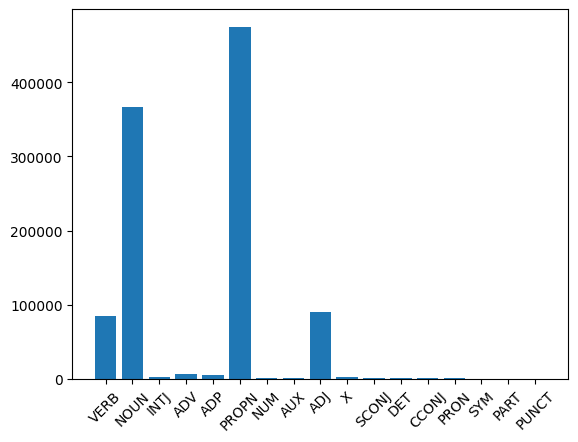

In [20]:
plt.bar(final_dict.keys(), final_dict.values())
plt.xticks(rotation=45)
plt.show()

## item c

In [21]:
selected_entities = []
for doc in converted_data:
    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'LOC']:
            selected_entities.append(ent.text)
selected_entities

['destin',
 'ryokan riad',
 'park homestay',
 'cater accommod tini',
 'wuchang saint eval great',
 'hrvatski srpski',
 'properti lonavala',
 'properti bangalor',
 'destin embrac',
 'ryokan ryokan riad riad',
 'homestay homestay',
 'luxuri tent luxuri',
 'cater accommod',
 'cater properti tini',
 'chang book',
 'relat servic',
 'mo tu',
 'sa su',
 'relat',
 'worri season',
 'compani manag',
 'decad plu experi',
 'airlin american eagl airlin',
 'airlin',
 'airlin fulli',
 'septemb compani big partnership',
 'issu',
 'destin info voila',
 'accommod requir',
 'worri expedia',
 'awesom',
 'accommod detail',
 'compani believ',
 'david jone',
 'jun jul aug',
 'averag passeng includ infant',
 'economi remov plu',
 'averag passeng includ infant',
 'lo angel flight',
 'jaipur bangkok',
 'bengaluru kochi',
 'kolkata kochi',
 'kolkata mumbai',
 'bengaluru mumbai',
 'mumbai bengaluru',
 'jaipur bengaluru',
 'kolkata bengaluru',
 'bagdogra bengaluru',
 'kolkata toronto',
 'bengaluru toronto',
 'koch

## item d

In [27]:
persons = {}
for doc in converted_data:
    already_in_doc = []
    for ent in doc.ents:
        text = ent.text
        if ent.label_ in ['PERSON'] and text not in already_in_doc:
            already_in_doc.append(text)
            if text not in persons:
                persons[text] = 1
            else:
                persons[text] += 1
dict(sorted(persons.items(), key=lambda item: item[1], reverse=True))

{'newslett': 190,
 'chang': 112,
 'relat': 81,
 'christma': 67,
 'activ': 60,
 'innov': 58,
 'qualiti': 48,
 'cooki': 40,
 'februari': 36,
 'challeng': 36,
 'issu': 35,
 'fulli': 34,
 'materi': 31,
 'dec': 29,
 'max': 27,
 'mike': 26,
 'donald trump': 24,
 'joe biden': 23,
 'john': 22,
 'safari': 20,
 'subscrib newslett': 20,
 'emerg': 20,
 'societi': 19,
 'joe': 19,
 'johnson': 19,
 'privaci polici': 18,
 'militari': 18,
 'david': 18,
 'extrem': 17,
 'juli': 17,
 'usernam': 17,
 'mm': 16,
 'natur': 16,
 'initi': 16,
 'climat chang': 16,
 'gener': 16,
 'austria azerbaijan': 15,
 'bulgaria burkina': 15,
 'tim': 15,
 'taylor': 15,
 'matt': 15,
 'germani ghana': 14,
 'princip saudi arabia': 14,
 'wolf': 14,
 'diari': 14,
 'relat chang': 14,
 'cooki polici': 13,
 'javascript browser': 13,
 'eu': 13,
 'la vega': 12,
 'jordan kazakhstan': 12,
 'unfortun': 12,
 'kumar': 12,
 'divid': 12,
 'khan': 12,
 'eric': 12,
 'essenti websit': 12,
 'cooki ensur': 12,
 'john le': 12,
 'appli': 11,
 'festi